<a href="https://colab.research.google.com/github/Chaitya-shah8/techno-thunder/blob/seon/finalresnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 224
CHANNELS = 3
EPOCHS = 10

In [ ]:
dataset = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/bg_dataset',
    batch_size = BATCH_SIZE,
    image_size = (IMG_SIZE, IMG_SIZE),
    seed = 42,
    shuffle = True
)

Found 600 files belonging to 6 classes.


In [ ]:
class_name = dataset.class_names
class_name

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [ ]:
len(dataset)

19

In [ ]:
len(dataset)*BATCH_SIZE

608

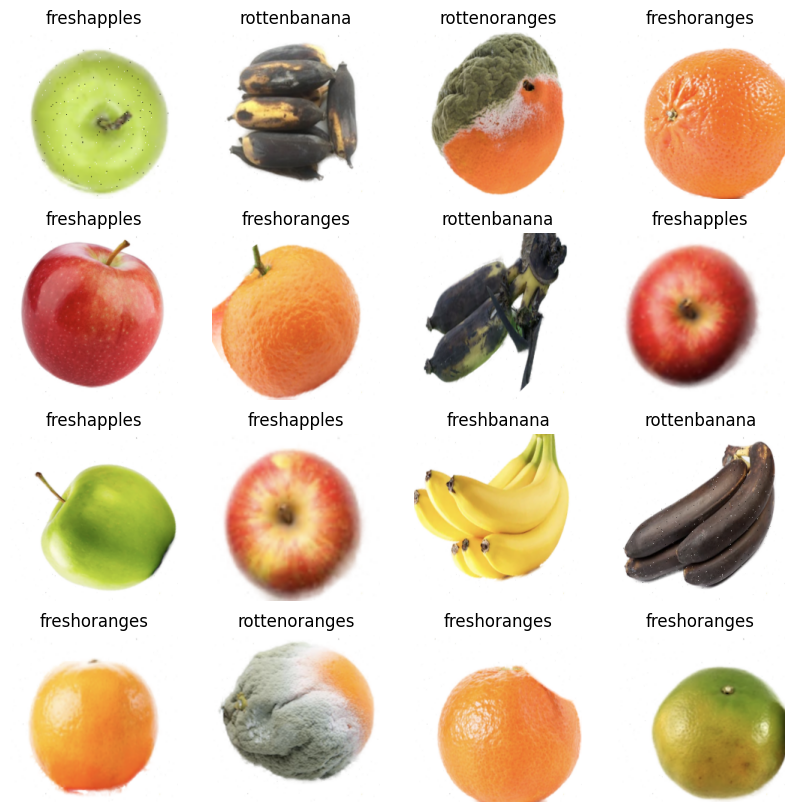

In [ ]:
fig = plt.figure(figsize = (10,10))
np.random.seed(56)
for image, label in dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_name[label[i]])

In [ ]:
def create_split(ds, train_split=0.8, shuffle=True, shuffle_size=10000):
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed= 42)

  ds_size = len(ds)

  train_size = int(ds_size * train_split)
  train_ds = ds.take(train_size)

  valid_ds = ds.skip(train_size)

  return train_ds, valid_ds

In [ ]:
train_ds, valid_ds = create_split(dataset)

In [ ]:
len(train_ds), len(valid_ds)

(15, 4)

In [ ]:
resize_rescale = keras.models.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [ ]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)

### VGG 16

In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
# model = keras.models.Sequential()
# model.add(resize_rescale)
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# # model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# #  adding Dense layers:
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=6, activation="softmax"))

### RESNET 50


In [ ]:
model = keras.models.Sequential()

pretrained_model_for_demo= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(224,224,3),

                   pooling='avg',classes=6,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

model.add(pretrained_model_for_demo)
model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24639878 (93.99 MB)
Trainable params: 1052166 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x = train_ds, epochs = 100, validation_data = valid_ds)

Epoch 1/100
15/15 [==============================] - 40s 518ms/step - loss: 1.3524 - accuracy: 0.6525 - val_loss: 0.2113 - val_accuracy: 0.9297
Epoch 2/100
15/15 [==============================] - 8s 338ms/step - loss: 0.2246 - accuracy: 0.9280 - val_loss: 0.1539 - val_accuracy: 0.9609
Epoch 3/100
15/15 [==============================] - 9s 418ms/step - loss: 0.0840 - accuracy: 0.9809 - val_loss: 0.0651 - val_accuracy: 0.9766
Epoch 4/100
15/15 [==============================] - 8s 328ms/step - loss: 0.0663 - accuracy: 0.9873 - val_loss: 0.0595 - val_accuracy: 0.9844
Epoch 5/100
15/15 [==============================] - 8s 324ms/step - loss: 0.0403 - accuracy: 0.9958 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 6/100
15/15 [==============================] - 9s 456ms/step - loss: 0.0361 - accuracy: 0.9915 - val_loss: 0.0523 - val_accuracy: 0.9922
Epoch 7/100
15/15 [==============================] - 7s 325ms/step - loss: 0.0350 - accuracy: 0.9958 - val_loss: 0.0204 - val_accuracy: 0.992

In [ ]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/Test',
    batch_size = BATCH_SIZE,
    image_size = (IMG_SIZE, IMG_SIZE),
    seed = 42,
    shuffle = True
)

Found 4362 files belonging to 6 classes.


In [ ]:
model.evaluate(test_dataset)

137/137 [==============================] - 397s 3s/step - loss: 0.2285 - accuracy: 0.9420


[0.2285037785768509, 0.941999077796936]

In [ ]:
test_data = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/testing',
     image_size = (IMG_SIZE, IMG_SIZE),
    shuffle = False
)

Found 25 files belonging to 1 classes.


In [ ]:
preds = model.predict(test_data)

1/1 [==============================] - 5s 5s/step


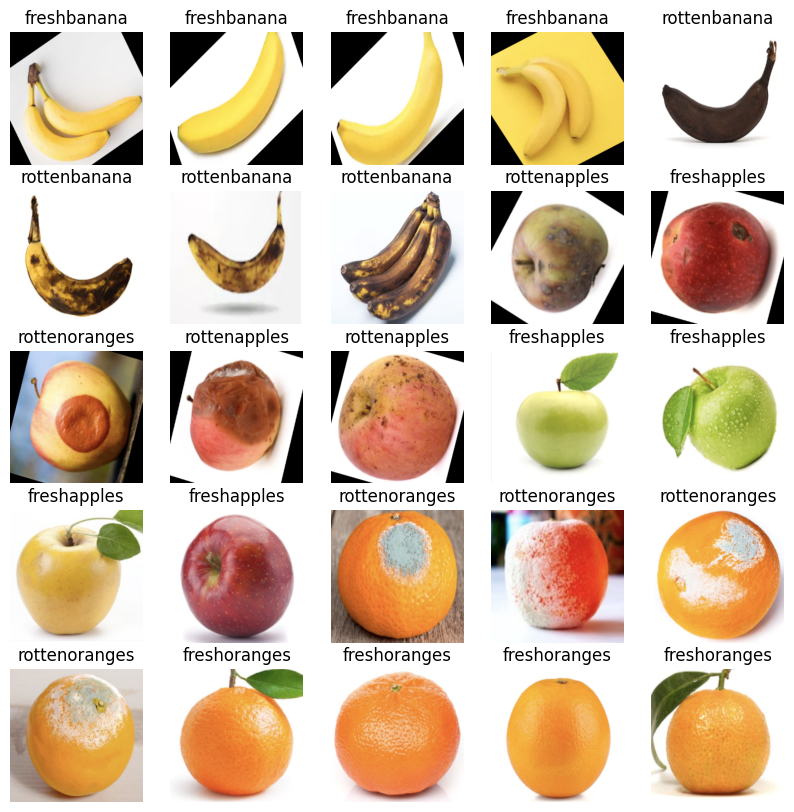

In [ ]:
fig = plt.figure(figsize = (10,10))
np.random.seed(56)
for image, label in test_data.take(1):
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_name[preds[i].argmax()])